# Wordnet

## [Download worked project](../../_static/generated/wordnet-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/wordnet)


> [WordNet](https://wordnet.princeton.edu/)® is a large lexical database of English. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. Synsets are interlinked by means of semantic relations. The resulting network of related words and concepts can be navigated with the browser. WordNet is also freely and publicly available for download, making it a useful tool for computational linguistics and natural language processing.
> Princeton University "About WordNet." [WordNet](https://wordnet.princeton.edu/). Princeton University. 2010    


![expected-diagram preview](expected-diagram.png)

In Python there are specialized libraries to read WordNet like [NLTK](https://www.nltk.org/howto/wordnet.html), but for the sake of this worksheet, you will parse the noun database as a text file which can be read line by line.

We will focus on _names_ and how they are linked by _IS A_ relation, for example, a `dalmatian` _IS A_  `dog` (_IS A_ is also called _hypernym_ relation)


<div class="alert alert-warning"> 
     
**REQUIREMENTS: Having read** [Relational data tutorial](https://en.softpython.org/relational/relational1-intro-sol.html#) **, which contains also instructions for installing required libraries.**
    
</div>    

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
wordnet-prj
    wordnet.ipynb
    wordnet-sol.ipynb
    data.noun
    dogs.noun
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `wordnet.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## 1. parse_db

First, you will begin with parsing an excerpt of wordnet [dogs.noun](dogs.noun) file, which is a noun database shown here in its entirety.

[According to documentation](https://wordnet.princeton.edu/documentation/wndb5wn), a noun database begins with several lines containing a copyright notice, version number, and license agreement: these lines all begin with **two spaces** and the line number like 

```
  1 This software and database is being provided to you, the LICENSEE, by  
  2 Princeton University under the following license.  By obtaining, using  
  3 and/or copying this software and database, you agree that you have  
```

Afterwards, each of following lines describe a noun synset, that is, a unique concept identified by a number called `synset_offset`.

- each synset can have many words to represent it - for example, the noun synset `02112993`  has `03` (`w_cnt`) words `dalmatian`  `coach_dog`, `carriage_dog`.
- a synset can be linked to other ones by relations. The dalmatian synset is linked to `002` (`p_cnt`) other synsets: to synset `02086723` by the `@` relation,  and to synset `02113184` by the `~` relation. For our purposes, you can focus on the `@` symbol which means _IS A_ relation (also called `hypernym`). If you search for a line starting with `02086723`, you will see it is the synset for `dog`, so Wordnet is telling us a `dalmatian` _IS A_ `dog`.


<div class="alert alert-warning">

**WARNING 1**: lines can be quite long so if they appear to span multiple lines don't be fooled : remember each name definition only occupies one single line with no carriage returns!

</div>


<div class="alert alert-warning">

**WARNING 2**: there are no empty lines between the synsets, here you see them just to visually separate the text blobs

</div>

```
  1 This software and database is being provided to you, the LICENSEE, by  
  2 Princeton University under the following license.  By obtaining, using  
  3 and/or copying this software and database, you agree that you have  
  4 read, understood, and will comply with these terms and conditions.:  
  5   
  6 Permission to use, copy, modify and distribute this software and  
  7 database and its documentation for any purpose and without fee or  
  8 royalty is hereby granted, provided that you agree to comply with  
  9 the following copyright notice and statements, including the disclaimer,  
  10 and that the same appear on ALL copies of the software, database and  
  11 documentation, including modifications that you make for internal  
  12 use or for distribution.  
  13   
  14 WordNet 3.1 Copyright 2011 by Princeton University.  All rights reserved.  
  15   
  16 THIS SOFTWARE AND DATABASE IS PROVIDED "AS IS" AND PRINCETON  
  17 UNIVERSITY MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR  
  18 IMPLIED.  BY WAY OF EXAMPLE, BUT NOT LIMITATION, PRINCETON  
  19 UNIVERSITY MAKES NO REPRESENTATIONS OR WARRANTIES OF MERCHANT-  
  20 ABILITY OR FITNESS FOR ANY PARTICULAR PURPOSE OR THAT THE USE  
  21 OF THE LICENSED SOFTWARE, DATABASE OR DOCUMENTATION WILL NOT  
  22 INFRINGE ANY THIRD PARTY PATENTS, COPYRIGHTS, TRADEMARKS OR  
  23 OTHER RIGHTS.  
  24   
  25 The name of Princeton University or Princeton may not be used in  
  26 advertising or publicity pertaining to distribution of the software  
  27 and/or database.  Title to copyright in this software, database and  
  28 any associated documentation shall at all times remain with  
  29 Princeton University and LICENSEE agrees to preserve same. 
```

**01320032** 05 n 02 domestic_animal 0 domesticated_animal 0 007 @ 00015568 n 0000 ~ 01320304 n 0000 ~ 01320544 n 0000 ~ 01320872 n 0000 ~ 02086723 n 0000 ~ 02124460 n 0000 ~ 02125232 n 0000 | any of various animals that have been tamed and made fit for a human environment

**02085998** 05 n 02 canine 0 canid 0 011 @ 02077948 n 0000 #m 02085690 n 0000 + 02688440 a 0101 ~ 02086324 n 0000 ~ 02086723 n 0000 ~ 02116752 n 0000 ~ 02117748 n 0000 ~ 02117987 n 0000 ~ 02119787 n 0000 ~ 02120985 n 0000 %p 02442560 n 0000 | any of various fissiped mammals with nonretractile claws and typically long muzzles

**02086723** 05 n 03 dog 0 domestic_dog 0 Canis_familiaris 0 023 @ 02085998 n 0000 @ 01320032 n 0000 #m 02086515 n 0000 #m 08011383 n 0000 ~ 01325095 n 0000 ~ 02087384 n 0000 ~ 02087513 n 0000 ~ 02087924 n 0000 ~ 02088026 n 0000 ~ 02089774 n 0000 ~ 02106058 n 0000 ~ 02112993 n 0000 ~ 02113458 n 0000 ~ 02113610 n 0000 ~ 02113781 n 0000 ~ 02113929 n 0000 ~ 02114152 n 0000 ~ 02114278 n 0000 ~ 02115149 n 0000 ~ 02115478 n 0000 ~ 02115987 n 0000 ~ 02116630 n 0000 %p 02161498 n 0000 | a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds; "the dog barked all night"

**02106058** 05 n 01 working_dog 0 016 @ 02086723 n 0000 ~ 02106493 n 0000 ~ 02107175 n 0000 ~ 02109506 n 0000 ~ 02110072 n 0000 ~ 02110741 n 0000 ~ 02110906 n 0000 ~ 02111074 n 0000 ~ 02111324 n 0000 ~ 02111699 n 0000 ~ 02111802 n 0000 ~ 02112043 n 0000 ~ 02112177 n 0000 ~ 02112339 n 0000 ~ 02112463 n 0000 ~ 02112613 n 0000 | any of several breeds of usually large powerful dogs bred to work as draft animals and guard and guide dogs

**02112993** 05 n 03 dalmatian 0 coach_dog 0 carriage_dog 0 002 @ 02086723 n 0000 ~ 02113184 n 0000 | a large breed having a smooth white coat with black or brown spots; originated in Dalmatia

**02107175** 05 n 03 shepherd_dog 0 sheepdog 0 sheep_dog 0 012 @ 02106058 n 0000 ~ 02107534 n 0000 ~ 02107903 n 0000 ~ 02108064 n 0000 ~ 02108157 n 0000 ~ 02108293 n 0000 ~ 02108507 n 0000 ~ 02108682 n 0000 ~ 02108818 n 0000 ~ 02109034 n 0000 ~ 02109202 n 0000 ~ 02109314 n 0000 | any of various usually long-haired breeds of dog reared to herd and guard sheep

**02111324** 05 n 02 bulldog 0 English_bulldog 0 003 @ 02106058 n 0000 + 01121448 v 0101 ~ 02111567 n 0000 | a sturdy thickset short-haired breed with a large head and strong undershot lower jaw; developed originally in England for bull baiting

**02116752** 05 n 01 wolf 0 007 @ 02085998 n 0000 #m 02086515 n 0000 ~ 01324999 n 0000 ~ 02117019 n 0000 ~ 02117200 n 0000 ~ 02117364 n 0000 ~ 02117507 n 0000 | any of various predatory carnivorous canine mammals of North America and Eurasia that usually hunt in packs



### Field description

While parsing, skip the copyright notice. Then, each name definition follows the following format:

```
synset_offset lex_filenum ss_type w_cnt word lex_id [word  lex_id...] p_cnt [ptr...] | gloss 
```

* `synset_offset`: Number identifying the synset, for example `02112993`. **MUST be converted to a Python int**

* `lex_filenum`: Two digit decimal integer corresponding to the lexicographer file name containing the synset, for example `03`. **MUST be converted to a Python int**

* `ss_type`: One character code indicating the synset type, store it as a string.



* `w_cnt`: Two digit **hexadecimal** integer indicating the number of words in the synset, for example `b3`. **MUST be converted to a Python int**.

<div class="alert alert-warning">

**WARNING**: `w_cnt` is expressed as **hexadecimal**!

To convert an hexadecimal number like `b3` to a decimal int you will need to specify the base 16 like in `int('b3',16)` which produces the decimal integer `179`.
</div>

* Afterwards, there will be `w_cnt` words, each represented by two fields (for example, `dalmatian 0`). You MUST store these fields into a Python list called `words` containing a dictionary for each word, having these fields:

    - `word`: ASCII form of a word (example: `dalmatian`), with spaces replaced by underscore characters (`_`)

    - `lex_id`: One digit **hexadecimal** integer (example: `0`) that **MUST be converted to a Python int**

<div class="alert alert-warning">

**WARNING**: `lex_id` is expressed as **hexadecimal**!

To convert an hexadecimal number like `b3` to a decimal int you will need to specify the base 16 like in `int('b3',16)` which produces the decimal integer `179`.
</div>


* `p_cnt`: Three digit **decimal** integer indicating the number of pointers (that is, relations like for example _IS A_) from this synset to other synsets. **MUST be converted to a Python int** 

<div class="alert alert-warning">
    
**WARNING**: differently from `w_cnt`,  the value `p_cnt` is expressed as **decimal**!
</div>

* Afterwards, there will be `p_cnt` pointers, each represented by four fields `pointer_symbol` `synset_offset` `pos`  `source/target` (for example, `@ 02086723 n 0000`). **You MUST store these fields into a Python list called** `ptrs` containing a dictionary for each pointer, having these fields:

    - `pointer_symbol`: a symbol indicating the type of relation, for example `@` (which represents _IS A_ relation)
    - `synset_offset` : the identifier of the target synset, for example `02086723`. **You MUST convert this to a Python int**
    - `pos`: just parse it as a string (we will not use it)
    - `source/target`: just parse it as a string (we will not use it)

<div class="alert alert-warning">
    
**WARNING: DO NOT** assume first pointer is an `@` (_IS A_) !!

In the full database, the root synset _entity_ can't possibly have a parent synset:<br/><br/>


```


0        1  2 3  4      5 6   7 8        9 10   11 12      13 14   15 16       17 18
00001740 03 n 01 entity 0 003 ~ 00001930 n 0000 ~ 00002137 n  0000 ~  04431553 n  0000 | that which is perceived or known or inferred to have its own distinct existence (living or nonliving)

```
</div>

* `gloss`: Each synset contains a gloss (that is, a description). A gloss is represented as a vertical bar (`|`), followed by a text string that continues until the end of the line. For example, `a large breed having a smooth white coat with black or brown spots; originated in Dalmatia`. **Remove white spaces at the beginning/end.**

### Parsing the db


Implement a function which parses noun database filename as a text file and RETURN a dictionary containing 
all the synset found. Each key will be a synset_offset mapping to a dictionary holding the fields of the corresponding synset. 

**FULL expected output:** [expected_dogs_db.py](expected_dogs_db.py)
    

**Expected output EXCERPT** (showing only two items):

```python
>>> parse_db('dogs.noun')
{1320032: {'gloss': 'any of various animals that have been tamed and made fit '
                    'for a human environment',
           'lex_filenum': 5,
           'p_cnt': 7,
           'ptrs': [{'pointer_symbol': '@',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 15568},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 1320304},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 1320544},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 1320872},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2086723},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2124460},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2125232}],
           'ss_type': 'n',
           'synset_offset': 1320032,
           'w_cnt': 2,
           'words': [{'lex_id': 0, 'word': 'domestic_animal'},
                     {'lex_id': 0, 'word': 'domesticated_animal'}]},
 2085998: {'gloss': 'any of various fissiped mammals with nonretractile claws '
                    'and typically long muzzles',
           'lex_filenum': 5,
           'p_cnt': 11,
           'ptrs': [{'pointer_symbol': '@',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2077948},
                    {'pointer_symbol': '#m',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2085690},
                    {'pointer_symbol': '+',
                     'pos': 'a',
                     'source_target': '0101',
                     'synset_offset': 2688440},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2086324},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2086723},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2116752},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2117748},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2117987},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2119787},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2120985},
                    {'pointer_symbol': '%p',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 2442560}],
           'ss_type': 'n',
           'synset_offset': 2085998,
           'w_cnt': 2,
           'words': [{'lex_id': 0, 'word': 'canine'},
                     {'lex_id': 0, 'word': 'canid'}]},

   .
   .
   .

}
```

In [1]:

def parse_db(filename):
    
    
    ret = {}
    with open(filename, encoding='utf-8') as f:
        line=f.readline()
        r = 0
        while line.startswith('  '):
            line=f.readline()
            #print(line)
            r += 1


        while line != "":
            i = 0

            d = {}

            params  = line.split('|')[0].split(' ')
            
            d['synset_offset'] = int(params[0])    # '00001740'
            d['lex_filenum'] = int(params[1])      # '03'
            d['ss_type'] = params[2]          # 'n'
            # WARNING: HERE THE STRING REPRESENT A NUMBER IN *HEXADECIMAL* FORMAT,
            #          AND WE WANT TO STORE AN *INTEGER*
            #          TO DO THE CONVERSION PROPERLY, YOU NEED TO USE int(my_string, 16)
            d['w_cnt'] = int(params[3], 16)       # 'b3' -> 179  
            d['words'] = [] 
            i = 4
            for j in range(d['w_cnt']):
                wd = {
                      'word'  : params[i],     # 'entity'
                      'lex_id': int(params[i + 1],16), # '0'         
                }
                d['words'].append(wd)
                i += 2
               # 
            # WARNING: HERE THE STRING REPRESENT A NUMBER IN *DECIMAL* FORMAT, 
            #          AND WE WANT TO STORE AN *INTEGER*
            #          TO DO THE CONVERSION PROPERLY, YOU NEED TO USE int(my_string)
            d['p_cnt'] = int(params[i])       # '003' -> 3   
            d['ptrs'] = []
            i += 1
            for j in range(d['p_cnt']):
                ptr =  {                   
                         'pointer_symbol': params[i ],    # '~'
                         'synset_offset': int(params[i + 1]),  # '00001930' 
                         'pos': params[i + 2],           # 'n'
                         'source_target':params[i + 3],  # '0000'
                       }
                d['ptrs'].append(ptr)
                i += 4


            d['gloss'] = line.split('|')[1].strip()

            ret[d['synset_offset']] = d
            i += 1
            line=f.readline()
        return ret
    
    
dogs_db = parse_db('dogs.noun')


{1320032: {'gloss': 'any of various animals that have been tamed and made fit '
                    'for a human environment',
           'lex_filenum': 5,
           'p_cnt': 7,
           'ptrs': [{'pointer_symbol': '@',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 15568},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 1320304},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 1320544},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                     'synset_offset': 1320872},
                    {'pointer_symbol': '~',
                     'pos': 'n',
                     'source_target': '0000',
                

In [1]:

def parse_db(filename):
    raise Exception('TODO IMPLEMENT ME !')
    
dogs_db = parse_db('dogs.noun')


In [2]:
# EXECUTE FOR TESTING
from pprint import pformat; from expected_dogs_db import expected_dogs_db
for soff in expected_dogs_db.keys():
    if soff not in dogs_db: print('\nERROR: MISSING synset', soff); break
    for k in expected_dogs_db[soff]:
        if k not in dogs_db[soff]:
            print('\nERROR at synset', soff,'\n\n   MISSING key:', k); break
        if expected_dogs_db[soff][k] != dogs_db[soff][k]:
            print('\nERROR at synset', soff, 'key:',k)
            print('  ACTUAL:\n', pformat(dogs_db[soff][k]))
            print('  EXPECTED:\n', pformat(expected_dogs_db[soff][k]))
            break
for soff in dogs_db:
    if soff not in expected_dogs_db.keys():
        print('\nERROR: found extra synset', soff, 'in dogs_db but not in expected_dogs_db!')    
assert dogs_db == expected_dogs_db        

## 2. to_adj

Implement a function `to_adj` which takes the parsed db and RETURN a graph-like data structure in  [adjacency list format](https://en.softpython.org/relational/relational1-intro-sol.html#Adjacency-lists). Each node represents a synset - as label use the first word of the synset. A node is linked to another one if there is a _IS A_ relation among the nodes, so use the `@` symbol to filter the hypernyms.

**IMPORTANT**: not all linked synsets are present in the dogs excerpt.

**HINT**: If you couldn't implement the `parse_db` function properly, use [expected_dogs_db.py](expected_dogs_db.py)

**Expected output:**

```python
{'bulldog': ['working_dog'],
 'canine': [],
 'dalmatian': ['dog'],
 'dog': ['canine', 'domestic_animal'],
 'domestic_animal': [],
 'shepherd_dog': ['working_dog'],
 'wolf': ['canine'],
 'working_dog': ['dog']}
```

In [3]:


def to_adj(db):
    
    ret = {}

    for d in db.values():
        targets = []
        for ptr in d['ptrs']:
            if ptr['pointer_symbol'] == '@':
                if ptr['synset_offset'] in db:
                    targets.append(db[ptr['synset_offset']]['words'][0]['word'])
                #else:
                #    targets.append(ptr['synset_offset'])
        ret[d['words'][0]['word']] = targets
    return ret
    

dogs_graph = to_adj(dogs_db)
from pprint import pprint
pprint(dogs_graph)

{'bulldog': ['working_dog'],
 'canine': [],
 'dalmatian': ['dog'],
 'dog': ['canine', 'domestic_animal'],
 'domestic_animal': [],
 'shepherd_dog': ['working_dog'],
 'wolf': ['canine'],
 'working_dog': ['dog']}


In [3]:


def to_adj(db):
    raise Exception('TODO IMPLEMENT ME !')

dogs_graph = to_adj(dogs_db)
from pprint import pprint
pprint(dogs_graph)


### Check results

If parsing is right, you should get the following graph:

<div class="alert alert-warning">

**DO NOT** implement any drawing function, this is just for checking your results
</div>

Image saved to file:  expected-diagram.png


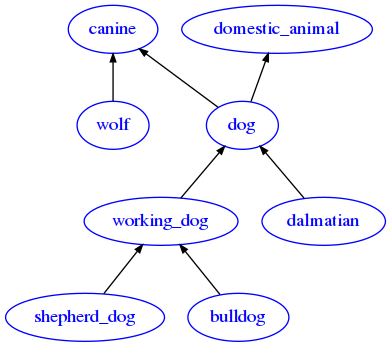

In [4]:
from soft import draw_adj
draw_adj(dogs_graph, options={'graph':{'rankdir':'BT'}}

        )

## 3. hist

You are given a dictionary mapping each relation symbol (i.e. `@`) to its description (i.e. `Hypernym`). 

Implement a function to draw the histogram of relation frequencies found in the relation links of the entire Wordnet, which can be loaded from the file [data.noun](data.noun). If you previously implemented `parse_db` in a correct way, you should be able to load the whole db. If for any reasons you can't, try at least to draw the histogram of frequencies found in [expected_dogs_db.py](expected_dogs_db.py)

- sort the histogram from greatest to lowest frequency
- display the relation names nicely, adding newlines if necessary
- **DO NOT** count the relations containing the word `'domain'` inside (upper/lowercase)
- **DO NOT** count the '\\' relation

**Expected output:**

```
{'!': 2153,
 '#m': 12287,
 '#p': 9110,
 '#s': 796,
 '%m': 12287,
 '%p': 9110,
 '%s': 796,
 '+': 37235,
 '=': 638,
 '@': 75915,
 '@i': 8588,
 '~': 75915,
 '~i': 8588}
```
![expected-plot.png](expected-plot.png)

{'!': 2153,
 '#m': 12287,
 '#p': 9110,
 '#s': 796,
 '%m': 12287,
 '%p': 9110,
 '%s': 796,
 '+': 37235,
 '=': 638,
 '@': 75915,
 '@i': 8588,
 '~': 75915,
 '~i': 8588}


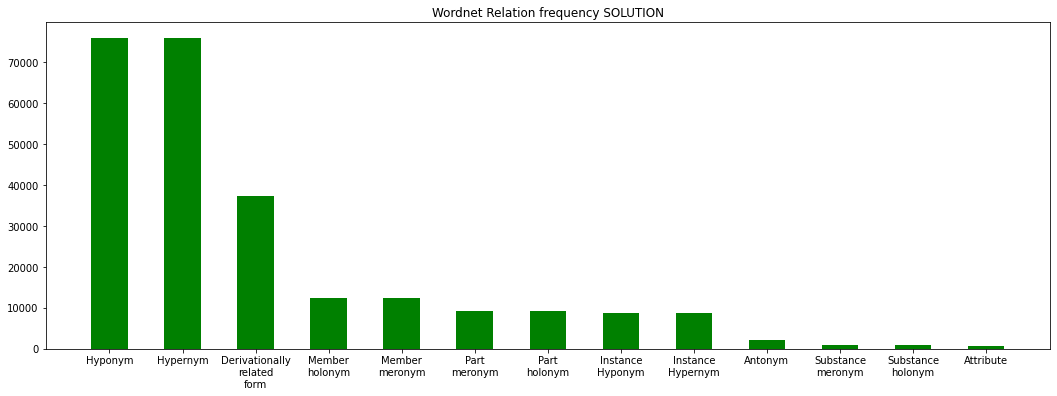

In [5]:


relation_names = {
    '!':'Antonym',
    '@':'Hypernym', 
    '@i':'Instance Hypernym',
    '~':'Hyponym',
    '~i':'Instance Hyponym',
    '#m':'Member holonym',
    '#s':'Substance holonym',
    '#p':'Part holonym',
    '%m':'Member meronym',
    '%s':'Substance meronym',
    '%p':'Part meronym',
    '=':'Attribute',
    '+':'Derivationally related form',
    ';c':'Domain of synset - TOPIC',           # DISCARD
    '-c':'Member of this domain - TOPIC',      # DISCARD
    ';r':'Domain of synset - REGION',          # DISCARD
    '-r':'Member of this domain - REGION',     # DISCARD
    ';u':'Domain of synset - USAGE',           # DISCARD
    '-u':'Member of this domain - USAGE',      # DISCARD
    '\\': 'Pertainym (pertains to noun)'       # DISCARD
}

def draw_hist(db):
    
    hist = {}
    for d in db.values():
        for ptr in d['ptrs']:
            ps = ptr['pointer_symbol']
            if 'domain' not in relation_names[ps].lower() and ps != '\\':
                if ps in hist:
                    hist[ps] += 1
                else:
                    hist[ps] = 0

    pprint(hist)      

    import numpy as np
    import matplotlib.pyplot as plt

    xs = list(range(len(hist.keys())))
    coords = [(x,hist[x]) for x in hist.keys()]
    coords.sort(key=lambda c: c[1], reverse=True)
    ys = [c[1] for c in coords]

    fig = plt.figure(figsize=(18,6))

    plt.bar(xs, ys,
            0.5,             # the width of the bars
            color='green',   # someone suggested the default blue color is depressing, so let's put green
            align='center')  # bars are centered on the xtick

    plt.title('Wordnet Relation frequency SOLUTION')
    xticks = [relation_names[c[0]].replace(' ', '\n') for c in coords]
    plt.xticks(xs,xticks)
    
    plt.show()
    
    
wordnet = parse_db('data.noun')  
draw_hist(wordnet)    

In [5]:


relation_names = {
    '!':'Antonym',
    '@':'Hypernym', 
    '@i':'Instance Hypernym',
    '~':'Hyponym',
    '~i':'Instance Hyponym',
    '#m':'Member holonym',
    '#s':'Substance holonym',
    '#p':'Part holonym',
    '%m':'Member meronym',
    '%s':'Substance meronym',
    '%p':'Part meronym',
    '=':'Attribute',
    '+':'Derivationally related form',
    ';c':'Domain of synset - TOPIC',           # DISCARD
    '-c':'Member of this domain - TOPIC',      # DISCARD
    ';r':'Domain of synset - REGION',          # DISCARD
    '-r':'Member of this domain - REGION',     # DISCARD
    ';u':'Domain of synset - USAGE',           # DISCARD
    '-u':'Member of this domain - USAGE',      # DISCARD
    '\\': 'Pertainym (pertains to noun)'       # DISCARD
}

def draw_hist(db):
    raise Exception('TODO IMPLEMENT ME !')
    
wordnet = parse_db('data.noun')  
draw_hist(wordnet)    